In [109]:
# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader import data as wb

# Magic
%matplotlib inline

In [110]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = ['AAPL', 'JNJ', 'AGNC', 'KO', 'DAL', 'AMZN', 'TSLA', 'ENPH',
        'BABA', 'JD', 'V', 'O', 'WM']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [111]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1495 entries, 2014-09-19 to 2020-08-26
Data columns (total 13 columns):
AAPL    1495 non-null float64
JNJ     1495 non-null float64
AGNC    1495 non-null float64
KO      1495 non-null float64
DAL     1495 non-null float64
AMZN    1495 non-null float64
TSLA    1495 non-null float64
ENPH    1495 non-null float64
BABA    1495 non-null float64
JD      1495 non-null float64
V       1495 non-null float64
O       1495 non-null float64
WM      1495 non-null float64
dtypes: float64(13)
memory usage: 163.5 KB


In [112]:
historical_data.head()

,AAPL,JNJ,AGNC,KO,DAL,AMZN,TSLA,ENPH,BABA,JD,V,O,WM
Date,,,,,,,,,,,,,
2014-09-19,91.730469,91.684982,11.025264,34.855675,34.706215,331.320007,259.320007,16.850000,93.889999,28.350000,51.773079,32.541798,41.364761
2014-09-22,91.821304,91.591599,10.922181,34.996582,34.086460,324.500000,250.029999,16.059999,89.889999,26.969999,51.205662,32.170956,41.155106
2014-09-23,93.256874,91.235016,10.882905,34.723049,33.861919,323.630005,250.410004,15.580000,87.169998,26.570000,50.865692,31.761477,40.989109
2014-09-24,92.448242,92.236839,10.843635,35.038040,33.825985,328.209991,252.139999,14.740000,90.570000,27.180000,51.332565,31.591501,41.417175
2014-09-25,88.922958,90.929352,10.848540,34.631866,32.927792,321.929993,246.949997,13.980000,88.919998,26.570000,50.446728,31.637859,40.971638


In [113]:
historical_data.tail()

,AAPL,JNJ,AGNC,KO,DAL,AMZN,TSLA,ENPH,BABA,JD,V,O,WM
Date,,,,,,,,,,,,,
2020-08-20,473.100006,150.418854,13.94,47.349998,27.620001,3297.370117,2001.829956,73.089996,257.970001,73.940002,204.149994,61.009998,110.150002
2020-08-21,497.480011,151.749985,14.01,47.279999,27.270000,3284.719971,2049.979980,73.139999,265.799988,74.980003,204.130005,61.119999,111.160004
2020-08-24,503.429993,152.149994,14.25,47.970001,29.799999,3307.459961,2014.199951,73.360001,276.019989,76.180000,206.410004,62.439999,112.510002
2020-08-25,499.299988,152.059998,14.17,47.910000,30.100000,3346.489990,2023.339966,75.930000,286.000000,78.970001,208.100006,62.570000,113.190002
2020-08-26,507.079987,151.470001,14.13,47.740002,30.165001,3356.139893,2063.709961,77.769897,285.880005,79.745003,208.729996,62.014999,113.000000


In [114]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1495 entries, 2014-09-19 to 2020-08-26
Data columns (total 13 columns):
AAPL    1494 non-null float64
JNJ     1494 non-null float64
AGNC    1494 non-null float64
KO      1494 non-null float64
DAL     1494 non-null float64
AMZN    1494 non-null float64
TSLA    1494 non-null float64
ENPH    1494 non-null float64
BABA    1494 non-null float64
JD      1494 non-null float64
V       1494 non-null float64
O       1494 non-null float64
WM      1494 non-null float64
dtypes: float64(13)
memory usage: 163.5 KB


In [115]:
returns.head()

,AAPL,JNJ,AGNC,KO,DAL,AMZN,TSLA,ENPH,BABA,JD,V,O,WM
Date,,,,,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,0.000990,-0.001019,-0.009394,0.004034,-0.018019,-0.020799,-0.036482,-0.048019,-0.043537,-0.049902,-0.011020,-0.011461,-0.005081
2014-09-23,0.015513,-0.003901,-0.003602,-0.007847,-0.006609,-0.002685,0.001519,-0.030344,-0.030726,-0.014942,-0.006661,-0.012810,-0.004042
2014-09-24,-0.008709,0.010921,-0.003615,0.009031,-0.001062,0.014053,0.006885,-0.055423,0.038263,0.022699,0.009137,-0.005366,0.010389
2014-09-25,-0.038879,-0.014277,0.000452,-0.011660,-0.026912,-0.019320,-0.020799,-0.052937,-0.018386,-0.022699,-0.017407,0.001466,-0.010816


In [116]:
returns.tail()

,AAPL,JNJ,AGNC,KO,DAL,AMZN,TSLA,ENPH,BABA,JD,V,O,WM
Date,,,,,,,,,,,,,
2020-08-20,0.021947,0.006826,0.000000,-0.000422,-0.001809,0.011251,0.063572,-0.032309,-0.010105,0.018840,0.015600,0.015860,-0.003715
2020-08-21,0.050249,0.008811,0.005009,-0.001479,-0.012753,-0.003844,0.023768,0.000684,0.029901,0.013967,-0.000098,0.001801,0.009128
2020-08-24,0.011889,0.002633,0.016986,0.014488,0.088721,0.006899,-0.017608,0.003003,0.037729,0.015878,0.011107,0.021367,0.012071
2020-08-25,-0.008238,-0.000592,-0.005630,-0.001252,0.010017,0.011732,0.004528,0.034433,0.035519,0.035969,0.008154,0.002080,0.006026
2020-08-26,0.015462,-0.003888,-0.002827,-0.003555,0.002157,0.002879,0.019756,0.023943,-0.000420,0.009766,0.003023,-0.008910,-0.001680


In [117]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([28.48, 19.29, 23.96, 18.97, 40.86, 30.21, 52.4 , 89.34, 32.6 ,
       41.4 , 25.35, 29.89, 19.32])

In [118]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AAPL,0.11,1.80,28.61,28.48
1,JNJ,0.03,1.22,8.40,19.29
2,AGNC,0.02,1.52,4.15,23.96
3,KO,0.02,1.20,5.26,18.97
4,DAL,-0.01,2.58,-2.35,40.86
5,AMZN,0.15,1.91,38.75,30.21
6,TSLA,0.14,3.31,34.71,52.40
7,ENPH,0.10,5.65,25.59,89.34
8,BABA,0.07,2.06,18.63,32.60
9,JD,0.07,2.62,17.31,41.40


In [119]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AAPL   2020-03-16
JNJ    2018-12-14
AGNC   2020-03-12
KO     2020-03-12
DAL    2020-03-18
AMZN   2014-10-24
TSLA   2020-03-16
ENPH   2015-11-04
BABA   2015-01-29
JD     2020-03-16
V      2020-03-16
O      2020-03-16
WM     2020-03-12
dtype: datetime64[ns]

In [120]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AAPL   2020-03-13
JNJ    2020-03-30
AGNC   2020-03-25
KO     2020-04-06
DAL    2020-03-24
AMZN   2015-04-24
TSLA   2020-02-03
ENPH   2020-02-19
BABA   2017-06-08
JD     2019-08-13
V      2020-03-24
O      2020-03-24
WM     2020-03-17
dtype: datetime64[ns]

In [121]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AAPL,JNJ,AGNC,KO,DAL,AMZN,TSLA,ENPH,BABA,JD,V,O,WM
AAPL,0.000325,0.000096,0.000079,0.000087,0.000178,0.000183,0.000223,0.000280,0.000173,0.000212,0.000179,0.000111,0.000093
JNJ,0.000096,0.000149,0.000043,0.000076,0.000090,0.000077,0.000077,0.000078,0.000069,0.000085,0.000100,0.000073,0.000079
AGNC,0.000079,0.000043,0.000230,0.000078,0.000191,0.000051,0.000112,0.000171,0.000052,0.000061,0.000086,0.000142,0.000074
KO,0.000087,0.000076,0.000078,0.000144,0.000134,0.000057,0.000090,0.000096,0.000055,0.000069,0.000099,0.000111,0.000087
DAL,0.000178,0.000090,0.000191,0.000134,0.000668,0.000110,0.000231,0.000340,0.000163,0.000170,0.000198,0.000205,0.000125
AMZN,0.000183,0.000077,0.000051,0.000057,0.000110,0.000365,0.000230,0.000215,0.000189,0.000224,0.000155,0.000065,0.000066
TSLA,0.000223,0.000077,0.000112,0.000090,0.000231,0.000230,0.001098,0.000418,0.000222,0.000297,0.000205,0.000185,0.000084
ENPH,0.000280,0.000078,0.000171,0.000096,0.000340,0.000215,0.000418,0.003193,0.000265,0.000298,0.000243,0.000203,0.000097
BABA,0.000173,0.000069,0.000052,0.000055,0.000163,0.000189,0.000222,0.000265,0.000425,0.000338,0.000156,0.000072,0.000067
JD,0.000212,0.000085,0.000061,0.000069,0.000170,0.000224,0.000297,0.000298,0.000338,0.000685,0.000177,0.000082,0.000090


In [122]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AAPL,JNJ,AGNC,KO,DAL,AMZN,TSLA,ENPH,BABA,JD,V,O,WM
AAPL,0.081132,0.023990,0.019654,0.021749,0.044419,0.045784,0.055690,0.069907,0.043262,0.052938,0.044672,0.027659,0.023304
JNJ,0.023990,0.037214,0.010687,0.018964,0.022505,0.019182,0.019179,0.019580,0.017175,0.021152,0.025061,0.018146,0.019712
AGNC,0.019654,0.010687,0.057429,0.019599,0.047721,0.012726,0.028067,0.042835,0.012935,0.015288,0.021618,0.035575,0.018574
KO,0.021749,0.018964,0.019599,0.035987,0.033488,0.014170,0.022479,0.024104,0.013719,0.017364,0.024706,0.027643,0.021747
DAL,0.044419,0.022505,0.047721,0.033488,0.166961,0.027592,0.057646,0.085056,0.040774,0.042383,0.049604,0.051145,0.031300
AMZN,0.045784,0.019182,0.012726,0.014170,0.027592,0.091259,0.057406,0.053826,0.047156,0.056068,0.038723,0.016263,0.016423
TSLA,0.055690,0.019179,0.028067,0.022479,0.057646,0.057406,0.274572,0.104429,0.055430,0.074147,0.051180,0.046187,0.020972
ENPH,0.069907,0.019580,0.042835,0.024104,0.085056,0.053826,0.104429,0.798161,0.066301,0.074432,0.060774,0.050853,0.024221
BABA,0.043262,0.017175,0.012935,0.013719,0.040774,0.047156,0.055430,0.066301,0.106306,0.084449,0.039075,0.017993,0.016754
JD,0.052938,0.021152,0.015288,0.017364,0.042383,0.056068,0.074147,0.074432,0.084449,0.171356,0.044212,0.020585,0.022520


In [123]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AAPL,JNJ,AGNC,KO,DAL,AMZN,TSLA,ENPH,BABA,JD,V,O,WM
AAPL,1.000000,0.436601,0.287937,0.402509,0.381650,0.532084,0.373123,0.274711,0.465835,0.448970,0.618612,0.324861,0.423568
JNJ,0.436601,1.000000,0.231165,0.518212,0.285505,0.329166,0.189735,0.113610,0.273060,0.264879,0.512431,0.314700,0.529023
AGNC,0.287937,0.231165,1.000000,0.431124,0.487344,0.175785,0.223509,0.200071,0.165552,0.154111,0.355816,0.496637,0.401272
KO,0.402509,0.518212,0.431124,1.000000,0.432018,0.247253,0.226133,0.142225,0.221808,0.221121,0.513705,0.487495,0.593492
DAL,0.381650,0.285505,0.487344,0.432018,1.000000,0.223533,0.269234,0.232998,0.306054,0.250572,0.478843,0.418758,0.396583
AMZN,0.532084,0.329166,0.175785,0.247253,0.223533,1.000000,0.362651,0.199439,0.478766,0.448357,0.505604,0.180109,0.281462
TSLA,0.373123,0.189735,0.223509,0.226133,0.269234,0.362651,1.000000,0.223074,0.324445,0.341833,0.385258,0.294887,0.207205
ENPH,0.274711,0.113610,0.200071,0.142225,0.232998,0.199439,0.223074,1.000000,0.227612,0.201262,0.268320,0.190432,0.140360
BABA,0.465835,0.273060,0.165552,0.221808,0.306054,0.478766,0.324445,0.227612,1.000000,0.625698,0.472720,0.184626,0.266026
JD,0.448970,0.264879,0.154111,0.221121,0.250572,0.448357,0.341833,0.201262,0.625698,1.000000,0.421278,0.166368,0.281649


In [124]:
no_assets = len(tickers)

In [125]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0


In [126]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)
pflio_scenarios.to_csv("ret_vol_index.csv")

In [127]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.183810,0.214114
1,0.168295,0.200488
2,0.177501,0.199222
3,0.173420,0.228987
4,0.179600,0.247894


In [128]:
pflio_scenarios.tail()

,Return,Volatility
9995,0.114657,0.203982
9996,0.163172,0.208243
9997,0.175574,0.219268
9998,0.198599,0.209276
9999,0.143688,0.181391


In [140]:
for i in range(10000):
    if pflio_scenarios['Return'][i] >= 0.23 and pflio_scenarios['Volatility'][i] <= 0.21:
        print(pflio_scenarios.iloc[i])

Return        0.231290
Volatility    0.208319
Name: 5026, dtype: float64


In [141]:
index = 5026
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
pflio_wei2 = pflio_wei[index]

print(pflio_scenarios.iloc[index])
tickers_df = pd.DataFrame({'Symbol':tickers})

weights_df = pd.DataFrame({'Weights': pflio_wei2})
ideal_portfolio = pd.concat([tickers_df, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Weights', ascending=False)
ideal_portfolio

Return        0.231290
Volatility    0.208319
Name: 5026, dtype: float64


,Symbol,Weights
10,V,0.159009
6,TSLA,0.156678
12,WM,0.150274
5,AMZN,0.132596
0,AAPL,0.110227
11,O,0.096818
2,AGNC,0.062867
8,BABA,0.042181
3,KO,0.041496
9,JD,0.022431


In [142]:
# Calculate Weighted Returns 
weights = np.array([pflio_wei2])
weighted_returns = ( weights * returns)

In [143]:
#pflio_wei2

In [144]:
capital = 16000
price = []
for i in range(len(pflio_wei2)):
    price.append(round(capital*pflio_wei2[i],2))
price = np.array(price)
price_portfolio = pd.DataFrame({'Price':price})
ideal_portfolio = pd.concat([tickers_df, price_portfolio, weights_df], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Price', ascending=False)
ideal_portfolio

,Symbol,Price,Weights
10,V,2544.15,0.159009
6,TSLA,2506.85,0.156678
12,WM,2404.39,0.150274
5,AMZN,2121.53,0.132596
0,AAPL,1763.63,0.110227
11,O,1549.09,0.096818
2,AGNC,1005.88,0.062867
8,BABA,674.90,0.042181
3,KO,663.94,0.041496
9,JD,358.90,0.022431


In [145]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (250 days)", portfolio_return.mean()*250)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*10, pflio_wei2)))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*250, pflio_wei2)))
print("Portfolio Volatility (250 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*756, pflio_wei2)))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(tickers_df)):
    if i==0:
        div_risk = pflio_var - pflio_wei2[0]**2*variances['Variance'][0]
    else:
        div_risk -= pflio_wei2[i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

print("")
# Non Diversifiable Risk
non_div_risk1 = 0
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)*100
print("Non-Diversifiable Risk:", non_div_risk1, "%")

#print("")
non_div_risk2 = 0
for i in range(len(tickers_df)):
    non_div_risk2 += pflio_wei2[i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.009245403753734992
Portfolio Return (250 days) 0.2311350938433748
Portfolio Return (756 days) 0.6989525237823654

Portfolio Volatility (10 days) 0.041663847256164316
Portfolio Volatility (250 days) 0.20831923628082155
Portfolio Volatility (756 days) 0.3622599043708609

Diversifiable Risk: 35.0 %

Non-Diversifiable Risk: 1.34 %

Non-Diversifiable Risk: 1.34 %
Non-Diversifiable Risk: True


Text(0, 0.5, 'Expected Return')

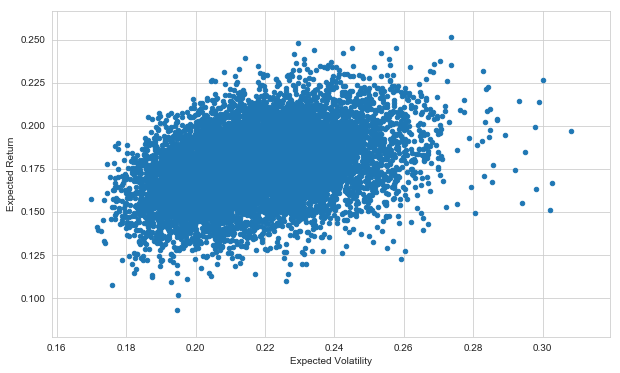

In [135]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

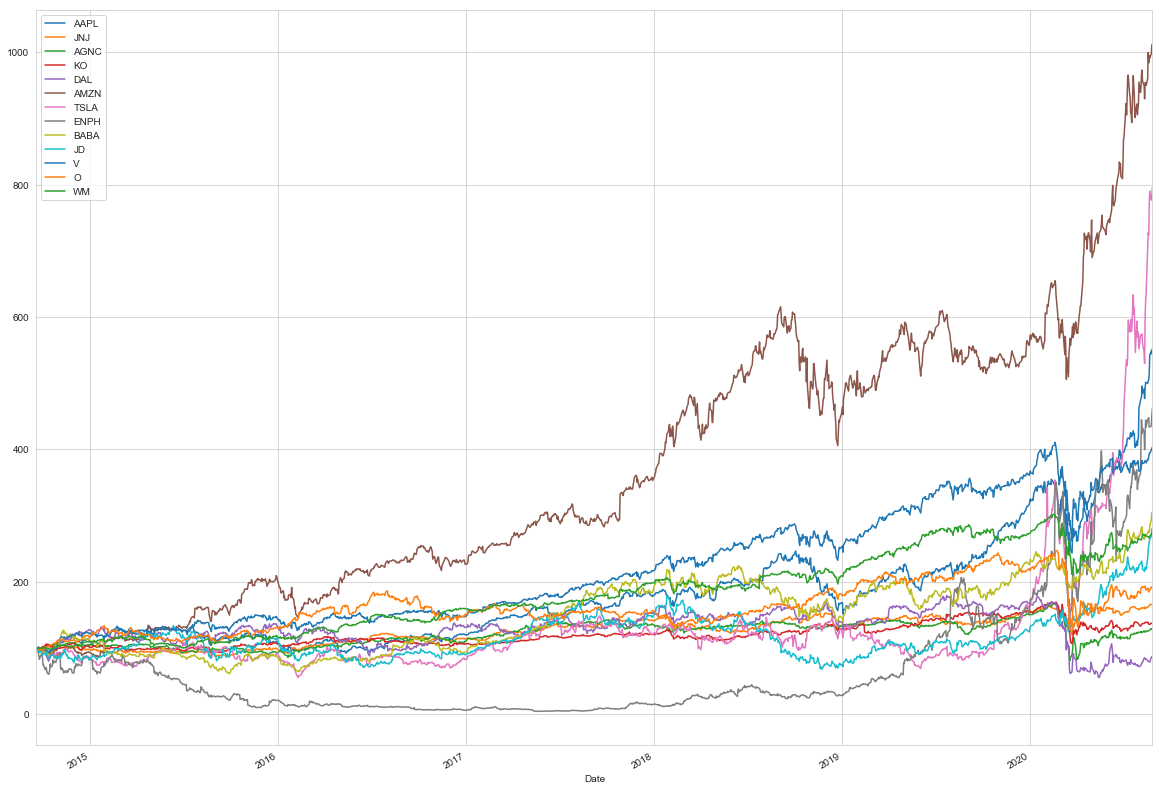

In [136]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

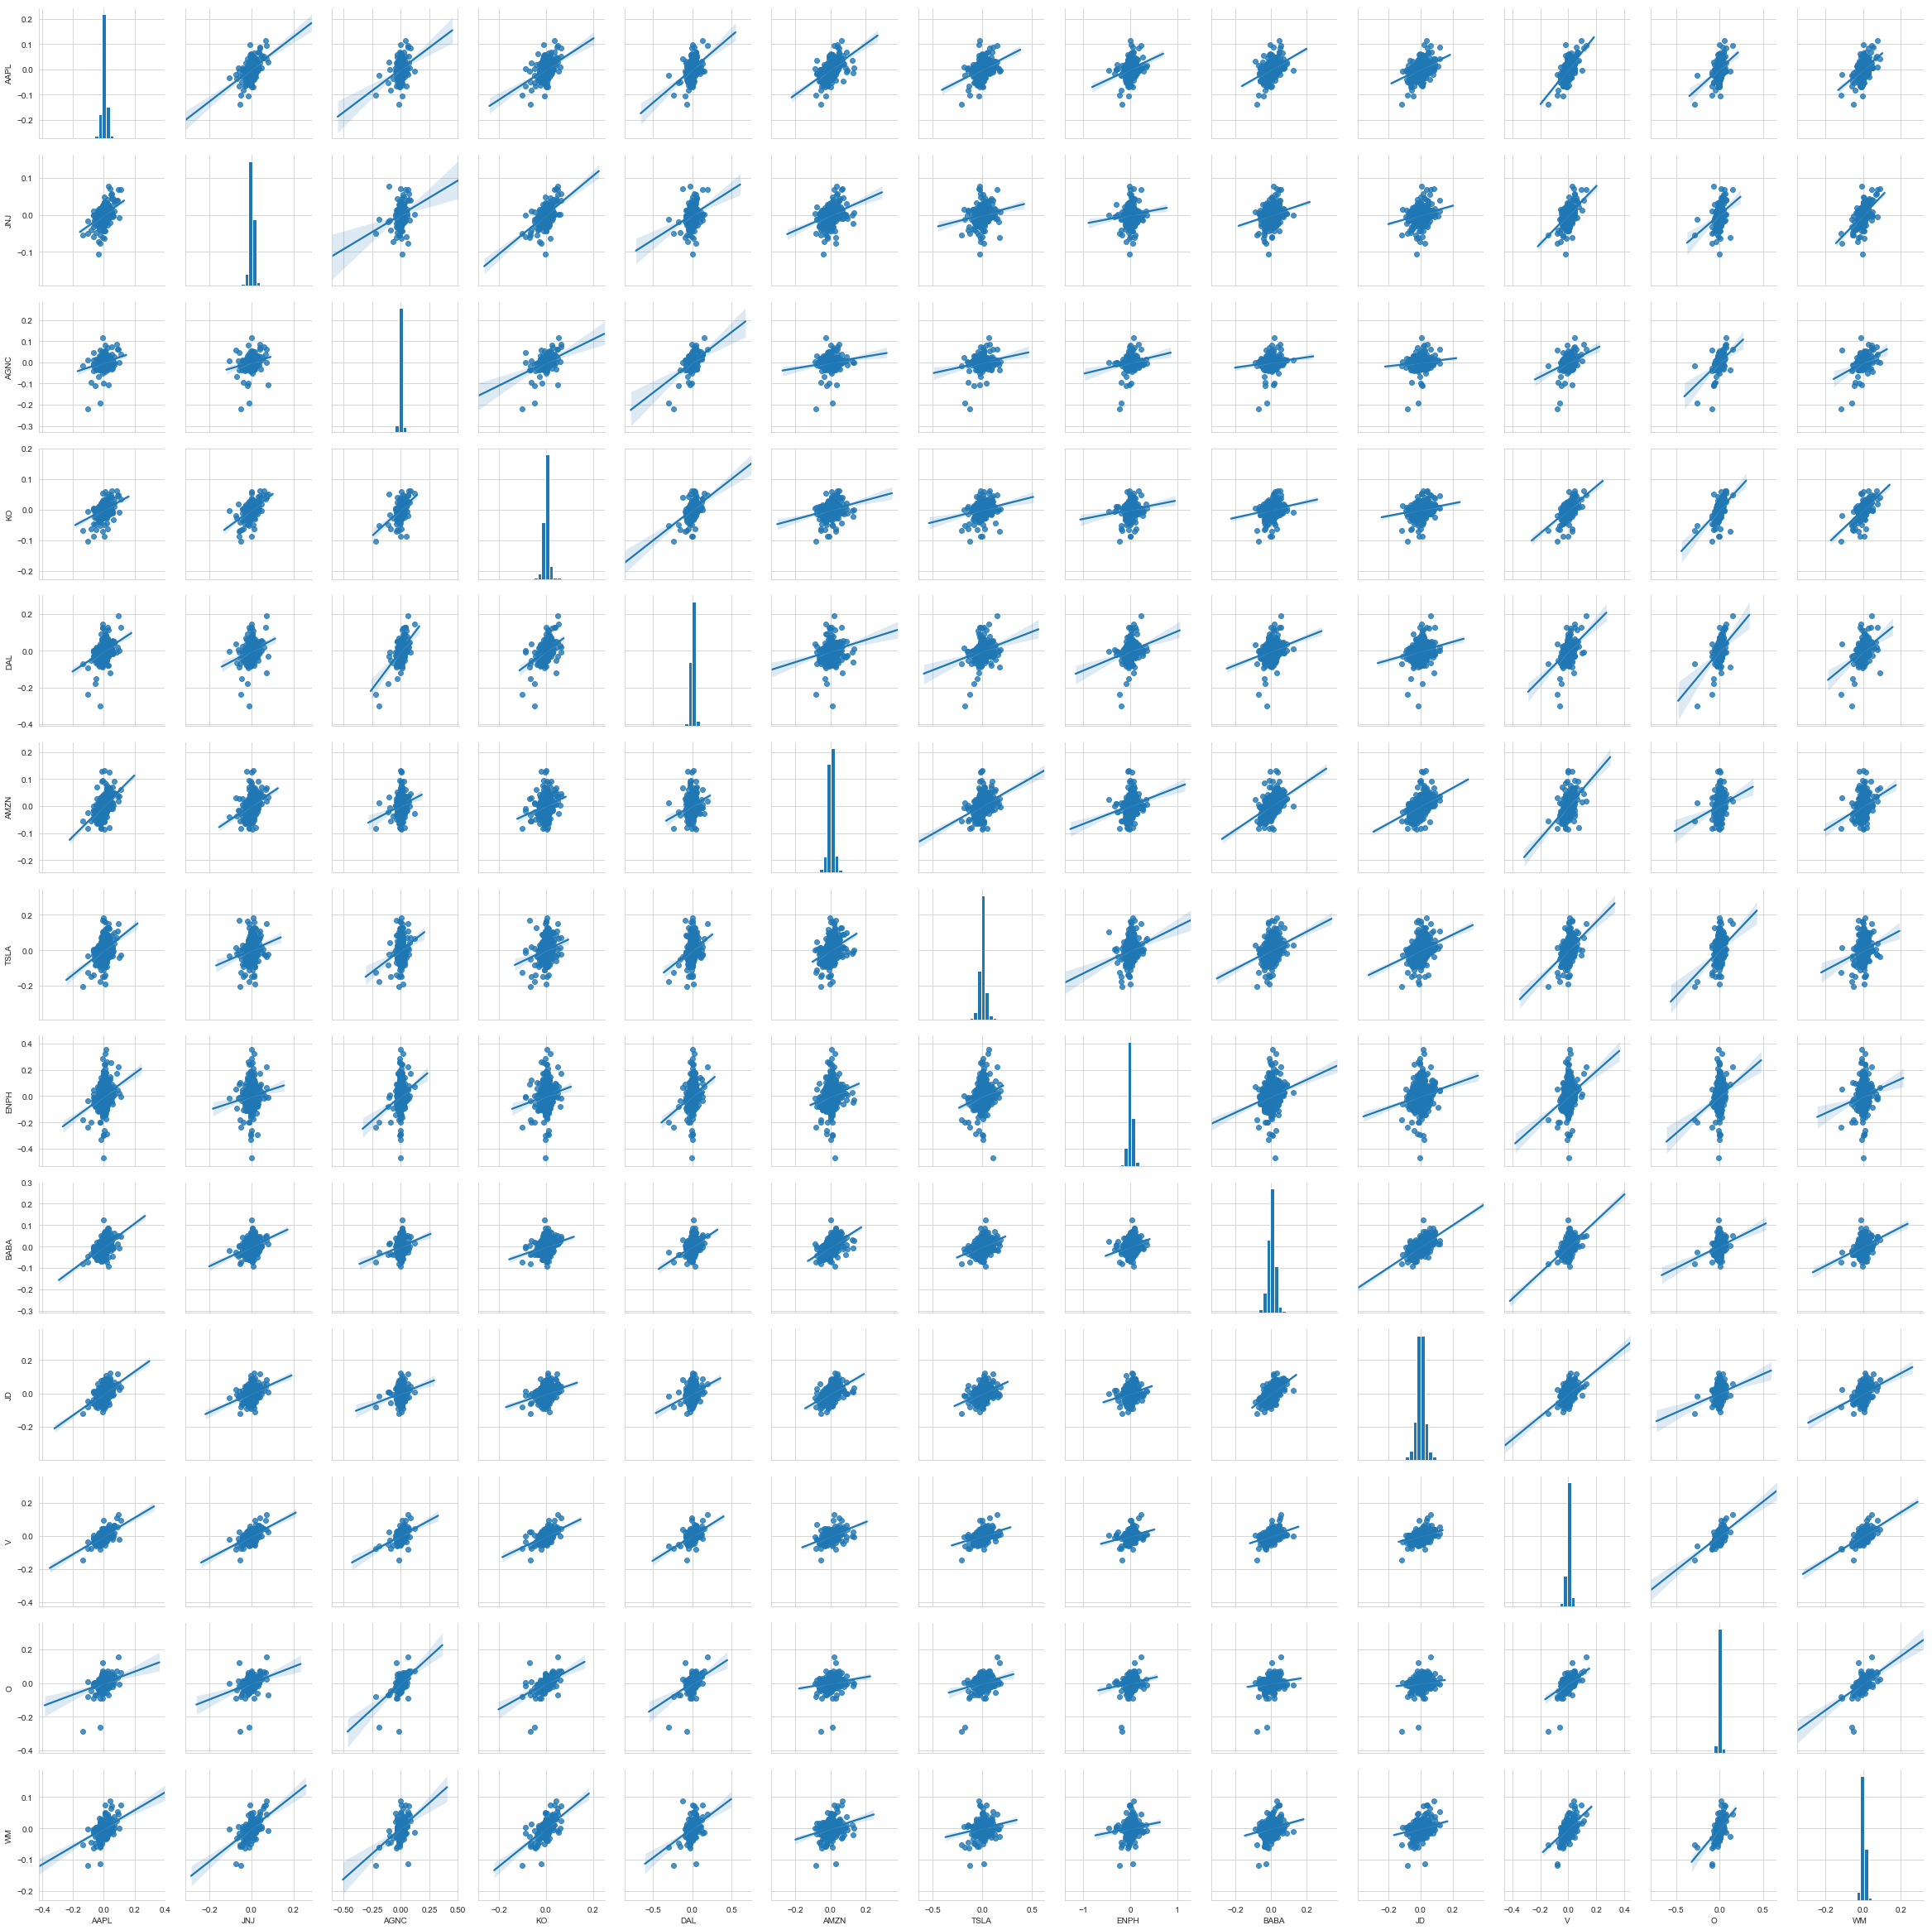

In [137]:
sns.set_style('whitegrid')
regression = sns.pairplot(returns[1:], kind="reg")
regression

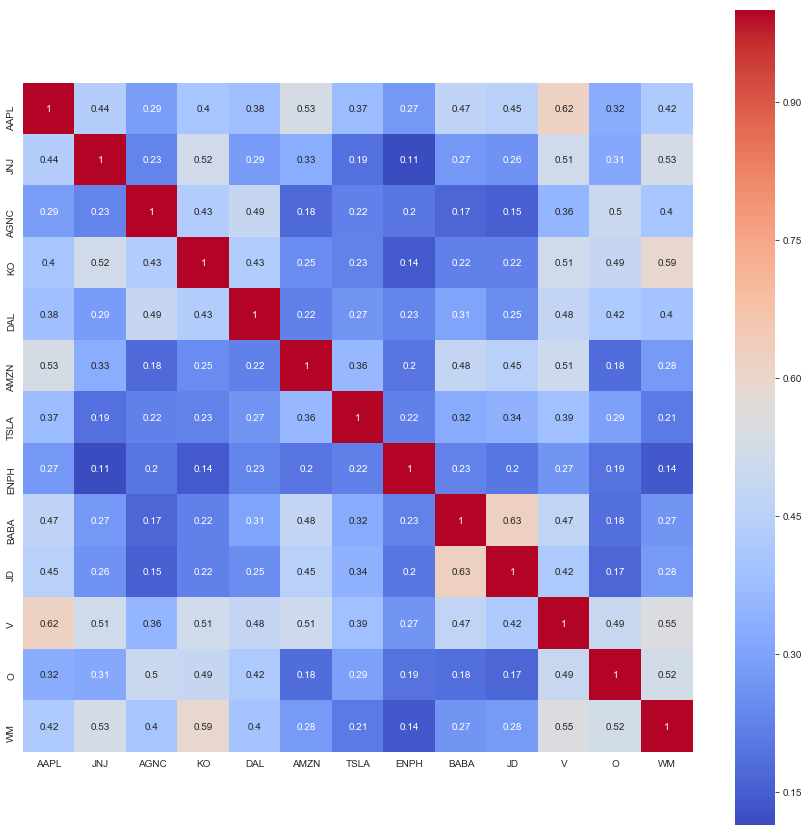

In [138]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap


## Notes

- Sell all JD after BABA earning calls (August 20)
- Sell 6% of BABA shares after earning calls (August 20)
- Re-run what happens after TSLA stock split 
- Re-run what happens after AAPL stock split
- Buy 8% JNJ shares